<a href="https://colab.research.google.com/github/gauravbatra14/Gaurav-Batra/blob/master/Titanic_Dataset_with_different_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Problem Statement**

The goal is to predict **survival of passengers** travelling in RMS Titanic using **Logistic regression**.

**2. Import Packages**

In [3]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**3. Data Loading and Description**

a) The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.

b) The dataset comprises of **891 observations of 12 columns**. Below is a table showing names of all the columns and their description.

In [4]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| Column Name   | Deccription                              |
| ------------- |:-----------                             :| 
| PassengerId   | Passenger Identity                       | 
| Survived      | Whether passenger survived or not        |  
| Pclass        | Class of ticket                          | 
| Name          | Name of passenger                        |   
| Sex           | Sex of passenger                         |
| Age           | Age of passenger                         |
| Sib      | Number of sibling and/or spouse travelling with passenger|
| Parch    | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                            |
| Fare          | Price of ticket                          |
| Cabin         | Cabin number                             |

**4. Pre-Processing the Data**

In [6]:
df_titanic.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Asim, Mr. Adola",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Sorting & Deal with Missing Values**

##### 1. Resolving Embarked values by taking Mode Value.
##### 2. Fill Age columns by taking Median Value.
##### 3. Dropping Cabin column as its having highrer missing values.
##### 4. Two new columns Creation "FamilySize (BY taking total family size" & "GenderClass (segmentation of Child and Adults".

In [0]:
df_titanic.Embarked = df_titanic.Embarked.fillna(df_titanic.Embarked.mode()[0])

In [0]:
df_titanic.Age = df_titanic.Age.fillna(df_titanic.Age.median())

In [0]:
df_titanic.Cabin = df_titanic.drop(columns = 'Cabin', axis =1, inplace = True)

In [0]:
df_titanic['Familysize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1

In [0]:
df_titanic['GenderClass'] = df_titanic.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'], axis =1)

In [12]:
df_titanic.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [13]:
df_titanic[df_titanic['Age']<15].head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,3,child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,1,child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,6,child


In [14]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Familysize   891 non-null    int64  
 12  GenderClass  891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


#### Dummification of **GenderClass & Embarked**.

In [0]:
df_titanic = pd.get_dummies(df_titanic, columns = ['Embarked', 'GenderClass'], drop_first = True)

#### Dropping these columns after taking total familysize and GenderClass as well as Name and ticket which is not useful.

In [0]:
titanic_data = df_titanic.drop(['Sex', 'Name', 'Ticket', 'SibSp', 'Parch'], axis =1) 

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,Fare,Familysize,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,0,0,1,0
2,3,1,3,26.0,7.9250,1,0,1,1,0
3,4,1,1,35.0,53.1000,2,0,1,1,0
4,5,0,3,35.0,8.0500,1,0,1,0,1


 #### Pair plot for checking co-relation between **Fare, Age, Pclass & Survived**

Text(0.5, 1.0, 'Pair Plot')

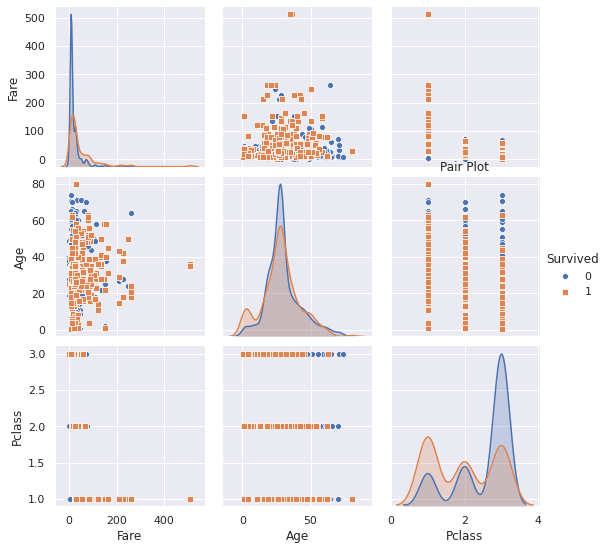

In [18]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"], hue="Survived", dropna=True, markers=["o", "s"])
plt.title('Pair Plot')

### **Heat Map for checking Co-relation between features**

Text(0.5, 1.0, 'Correlation between features')

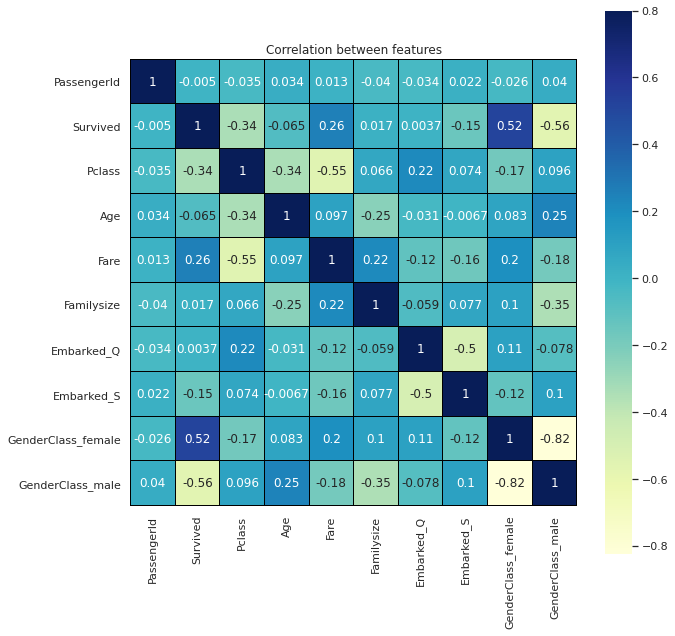

In [19]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features') 

#### 4. Preparing X & y using Pandas for Model Evalution 

In [20]:
X = titanic_data.loc[:,titanic_data.columns != 'Survived']
X.head()

,PassengerId,Pclass,Age,Fare,Familysize,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,0,0,1,0
2,3,3,26.0,7.9250,1,0,1,1,0
3,4,1,35.0,53.1000,2,0,1,1,0
4,5,3,35.0,8.0500,1,0,1,0,1


In [21]:
y = titanic_data['Survived'] 
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### 4.1 Splitting in train & test Datasets 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [23]:
print(X_train.shape)
print(y_train.shape)

(668, 9)
(668,)


#### 4.2 Model Selection using **Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_train = logreg.predict(X_train) 

In [0]:
y_pred_test = logreg.predict(X_test) 

### 4.3 Model Evalution using **Accuracy Score and Confusion Matrix** for Regression Model

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7937219730941704


In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

     0   1
0  122  17
1   29  55


In [29]:
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                 122                  17
Actual Survived              29                  55


###4.4 Model Selection using **Decision Tree Classifier** by Scaling 



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

### 4.5 Model Evalution using **Accuracy Score and Confusion Matrix** for **Decision Tree Classifier**

In [33]:
#prediction
y_pred = classifier.predict(X_test)

#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.7757847533632287


### 4.6 Model Selection using **Random Forest Classifier**

##### **Model without Parameter Specification**

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##### **Model with Parameter Specification**

In [35]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred_train = model.predict(X_train)
y_pred_train1 = model1.predict(X_train)

In [0]:
 # make predictions on the testing set

y_pred_test = model.predict(X_test)                                                          
y_pred_test1 = model1.predict(X_test)

### 4.7 Model Evalution using **Accuracy Score and Confusion Matrix** for **Random Forest Classifier**

In [38]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data using the model without parameter specification: 0.8475336322869955
Accuracy score for test data using the model with parameter specification: 0.8475336322869955


In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                 127                  12
Actual Survived              22                  62


In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                 128                  11
Actual Survived              23                  61


### 4.8 Model Selection using **Random Forest with RandomizedSearchCV**

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [0]:
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
                "min_samples_split": sp_randint(2, 11),
                "min_samples_leaf": sp_randint(1, 11),
                "bootstrap": [True, False],
                "n_estimators": [100, 400, 700, 1000, 1500],
                "criterion" : ["gini", "entropy"],
                'max_features': ['sqrt', 'log2', None]
              }
 # run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                    n_iter = n_iter_search,
                                    n_jobs = -1)

In [43]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

##### Using Model for **Prediction*

In [0]:
y_pred_test1 = random_search.predict(X_test)

##### Model Evalution using **Accuracy_Score**

In [46]:
from sklearn.metrics import accuracy_score
print('Accuracy score with RandomizedSearchCV is:', accuracy_score(y_test,y_pred_test1))

Accuracy score with RandomizedSearchCV is: 0.8251121076233184


##### Model Evaluation using **confusion matrix**

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))
confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                 121                  18
Actual Survived              21                  63
